In [15]:
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


# Tarea 4 Adán Miguel Rubiol

In [ ]:
using PyPlot

In [2]:
function polinomio(init) #Se crea la función polinomio y una lista de 100 ceros en los cuales se guardan la xi de cada iteración del método de newton . Donde la función nos pedirá una punto inicial para empezar el método.#
    
list=zeros(100);
f(x)=x^3-x^2-x-1;
f´(x)=3x^2-2x-1;
x=init
for i in 1:100
   x=x-f(x)/f´(x)
    list[i]=x;
    end
    return list
end;

In [3]:
list1=polinomio(2.0); #Se crean distintas listas que representan el método de newton para el polinomio anterior pero con 4 condiciones iniciales distintas. 
list2=polinomio(1.1);
list3=polinomio(-4.0);
list4=polinomio(-3.5);


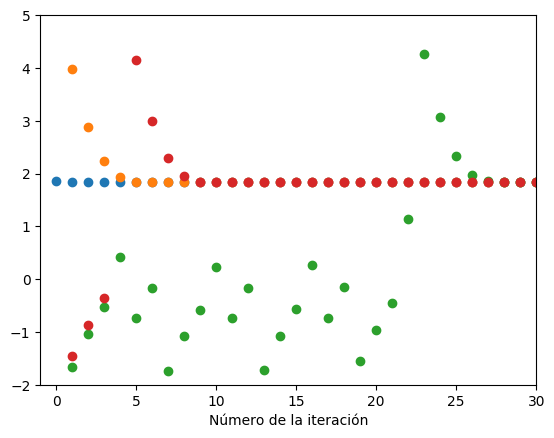

In [13]:

plot(real(list1),"o")
plot(real(list2),"o")
plot(real(list3),"o")
plot(real(list4),"o")
xlabel("Número de la iteración")
ylim(-2,5)
xlim(-1,30)
show();
#Aquí se grafican como converge el método con 4 condiciones iniciales distintas#

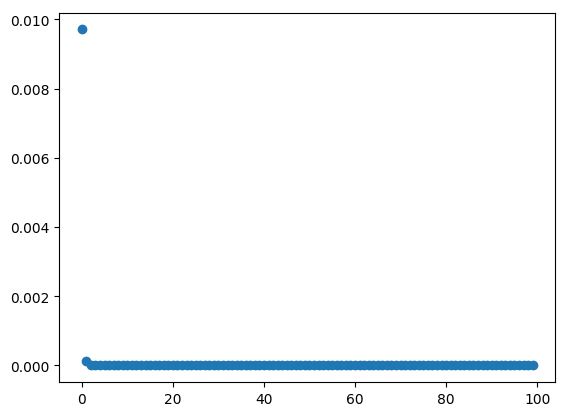

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2971d01b50>

In [5]:
S=list1[end] # Se define la raiz como el último valor de la lista#
x=(list1-S)/S #Se calcula el error para esta lista#
plot(x,"o") #Para la lista 1 graficamos el error y notamos de la gráfica que con la condición inicial el método converge muy rápidamente.#

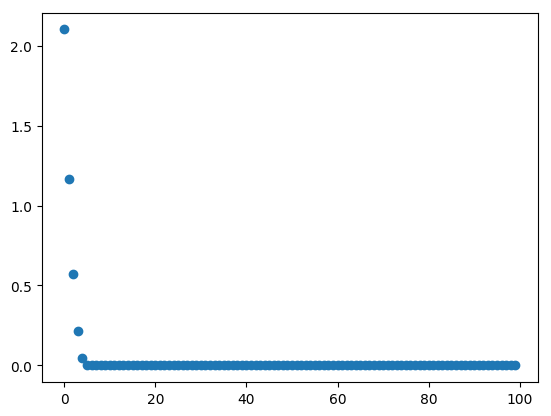

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2971dbc590>

In [6]:
S=list2[end]
x=(list2-S)/S
plot(x,"o")
#El mismo procedimiento se realiza con cada lista correspondiente a una condición inicial distinta.#

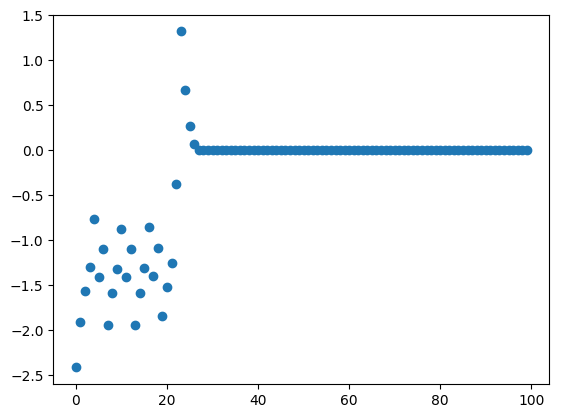

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2971ab1050>

In [7]:
S=list3[end]
x=(list3-S)/S
plot(x,"o")
#Notamos que con la condición inicial xi=-4 el error tiene un comportamiento mas caotico.#

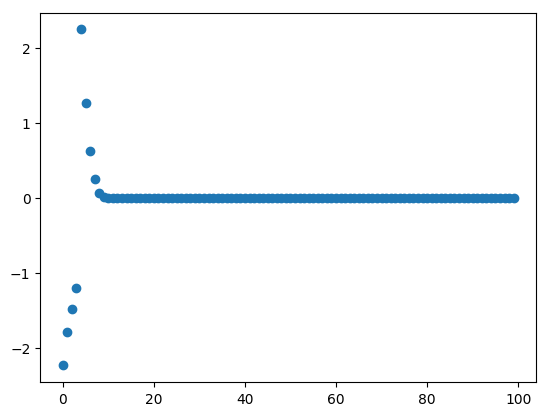

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f29719ec990>

In [8]:
S=list4[end]
x=(list4-S)/S
plot(x,"o")
#En la lista 4 c con la condición inicial xi=-3.5 el error tiene un comportamiento mas simétrico.#

In [19]:
function biseccion(a,b)
    list5=zeros(100)#sólo se agrega una lista de 100 ceros que serán utilizados después#
    p = (a+b)/2
    f(x) = x^3-x^2-x-1
    for i in 1:100
        if  f(a)*f(p) > 0
            a = p
        list5[i]=p; #en esta parte le decimos al programa que debe guardar cada iteración de p en la lista hacemos lo mismos en el siguinete if#
        end
        
        if f(b)*f(p) > 0
            b = p
        list5[i]=p;
        end
        p = (a+b)/2
    end
    return list5 #Al final le decimos al programa que nos regrese  la lista de como converge p#
end;

In [20]:
biseccion(1,2) #verificamos la convergencia del programa para el intervalo (1,2)#

100-element Array{Float64,1}:
 1.5    
 1.75   
 1.875  
 1.8125 
 1.84375
 1.82813
 1.83594
 1.83984
 1.83789
 1.83887
 1.83936
 1.83911
 1.83923
 ⋮      
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929

In [21]:
plot(real(list5),"o")
xlabel("Número de la iteración")
ylim(1,5)
xlim(-1,30)
show();#Se grafica como convergen los puntos p del método de bisección#

LoadError: [91mUndefVarError: list5 not defined[39m

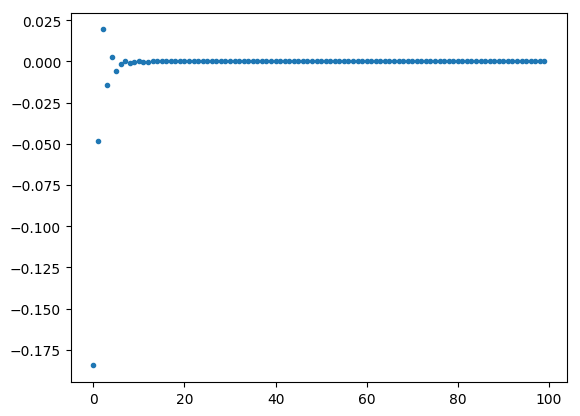

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb9f1148050>

In [25]:
S=list5[end]#Asignamos el valor de la raiz al ultimo valor de la lista ya que este es muy próximo a la raiz real#
x=(list5-S)/S#Se calcula el error#
plot(x,".") #Aqui graficamos el error para el método de bisección# 

In [ ]:
Pkg.add("SymPy")

In [ ]:
using SymPy

In [10]:
x=symbols("x") #Ahora en el segundo ejercicio definimos una variable simbólica x

x

In [29]:
function Fun(f,x0) #Con la función Fun tomaremos como entrada otra funcion y un punto, dando a la salida la funcion evaluada en el punto
    f(x0)
end

Fun (generic function with 1 method)

In [30]:
function newton(Fun,df,x0) #En este código implementamos el método de newton usando como entrada la función anterior, la derivada de f df y un punto.
    x=x0
    for i in 1:100
   x=x-Fun(x)/df(x);
    end
   return x # En la salida obtenemos la raiz deseada
end

newton (generic function with 1 method)

In [41]:
newton(3x^2-2x,6x-2,0) #Vemos que el método funciona para un polinomio sencillo

0

In [42]:
newton(3x^2-2x,6x-2,0.6) #Y podemos obtener con el método las dos raices reales del polinomio

0.666666666666667

In [ ]:
function Newton(Fun,xi,d=1e-8) #Se crea una función de la cual podemos obtener directamente la riuz buscada
    #deacuerdo a una tolerancia dada y usando while esta vez
    x=Sym("x") #Se declara la variable simbólica x
    df=diff(Fun(x)) # calculamos la derivada de Fun(x)
    e=d+1
    while d<e  #creamos la rutina de while hasta una cierta tolerancia dada por e
        xi=xi-Fun(xi)/N(df(xi))
       e=(F(xi)^2)^(1/2) 
    end
    return xi
end

In [43]:
function Newtonvector(Fun,xa,xb,e=1e-10) #Se realiza una rutina que como valor de entrada pide un valor inicial del intervalo 
    #un valor final y el número de partes a dividir el intervalo, con una tolerancia de inicio e.
    raices=[]         #Creamos espacio para las raices  en una entrada vacia del vector
    for i in linspace(xa,xb,100)      #Se divide el intervalo de condición inicial (xa,xb) en 100 partes
        push!(raices,Newton(Fun,i,e))  #colocamos el valor de la raiz obtenido por la rutina anterior dentro del vector
    end
    return raices # a la salida pedimos el vector de las raices
end

Newtonvector (generic function with 2 methods)

In [44]:
Newtonvector(x^2,1.0,3.0) #hacemos una prueba

100-element Array{Any,1}:
 7.62939453125000e-6
 7.78352371369949e-6
 7.93765289614899e-6
 8.09178207859848e-6
 8.24591126104798e-6
 8.40004044349747e-6
 8.55416962594697e-6
 8.70829880839646e-6
 8.86242799084596e-6
 9.01655717329545e-6
 9.17068635574495e-6
 9.32481553819445e-6
 9.47894472064394e-6
                   ⋮
 5.29819064670139e-6
 5.33672294231376e-6
 5.37525523792614e-6
 5.41378753353851e-6
 5.45231982915088e-6
 5.49085212476326e-6
 5.52938442037563e-6
 5.56791671598800e-6
 5.60644901160038e-6
 5.64498130721275e-6
 5.68351360282513e-6
 5.72204589843750e-6